In [5]:
## Build a predictiove model using NLP check mail is  spam or ham
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
am = pd.read_csv("E:/datasets/amazonreviews.tsv" , sep = '\t')



In [85]:
am.shape

(10000, 2)

In [86]:
am.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [87]:
am.isnull().sum()

label     0
review    0
dtype: int64

In [88]:
am.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [89]:
from nltk.corpus import stopwords

In [90]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
len(stopwords.words("english"))  ## most of languages are used like japnese,frech,curier,

179

In [92]:
am.review=am.review.str.lower()
# Its good and best practice to covert everything either is lowercase or uppercase
# because python is case sensative eg.Data,data DATA python all consider as different word

In [ ]:
## So basically we are doing data cleaning & data preparation


In [93]:
import string

In [94]:
string.punctuation   # it shows all punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
## what we have done till now ..We have read the file ...changed the name of columns
# Drop the unwanted columns
# convert it into lower case


## We have seen stopwards & punctuationns but we have not removed them till now

In [28]:
## Lets run our code on small example for understanding Removing Punctuation
abc = " i want to ? remove !! all the ... punctuation marks $ from %%"

abc_refined = [i for i in abc if i not in string.punctuation]
abc_refined




[' ',
 'i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ']

In [30]:
## All punctuation have been removed
abc_refined = "".join(abc_refined)
abc_refined

' i want to  remove  all the  punctuation marks  from '

In [31]:

abc_refined.split()  ### split based on the spaces(o/p is in the form of words)

['i', 'want', 'to', 'remove', 'all', 'the', 'punctuation', 'marks', 'from']

In [95]:
def text_process(mess): ### creating a function

    """ 
                ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords

    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


 





In [96]:
am['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [38]:
## This will count of each and every unique word
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = text_process ).fit(am["review"])



bow_transformer.vocabulary_

In [97]:
len(bow_transformer.vocabulary_)



9422

In [98]:
sp_bow = bow_transformer.transform(am.review)


In [99]:
type(sp_bow)

scipy.sparse.csr.csr_matrix

In [100]:
## Build model
from sklearn.model_selection import train_test_split

In [101]:
train_x,test_x,train_y, test_y = train_test_split(sp_bow,am.label,  test_size =0.2, random_state=555)

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
nb=MultinomialNB()

In [104]:
nb.fit(train_x,train_y)

MultinomialNB()

In [106]:
pred = nb.predict(test_x)

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
tab = confusion_matrix(pred, test_y)
tab

array([[871, 152],
       [171, 806]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(pred, test_y)

0.8385

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt=DecisionTreeClassifier()

In [113]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [114]:
pred_dt=dt.predict(test_x)

In [115]:
tab_dt=confusion_matrix(pred_dt,test_y)
tab_dt

array([[716, 287],
       [326, 671]], dtype=int64)

In [117]:
tab_dt.diagonal().sum()/tab_dt.sum()

0.6935

In [65]:
! pip install wordcloud

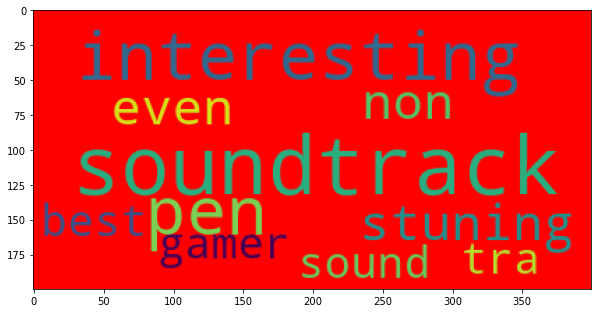

In [119]:
from wordcloud import WordCloud

cloud = WordCloud(max_words=10,background_color='red').generate(str(am['review']) )

plt.figure(figsize= (10 , 10) )
plt.imshow(cloud)



In [ ]:
## Lets look more in cloud
## How could we build the model which predict ham & spam using TDM??
## spam email contain words like free , ticket,movie,

# Ham not contain that words from spam and different set of words
## TDM (Presence of zeros & numbers could be quite diffrent set of ham and spam)

In [121]:
pos_df=am[am.label=='pos']
pos_df.shape
# This contain only those msg which are ham

(4903, 2)

In [77]:
neg_df=sp[sp.label=='neg']
spam_df.shape
# This contain only those msg which are spam

(922, 2)

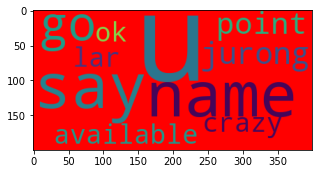

In [81]:
## This cloud is of ham msg

cloud = WordCloud(max_words=10,background_color='red').generate(str(ham_df['message']) )

plt.figure(figsize= (5 , 5) )
plt.imshow(cloud)


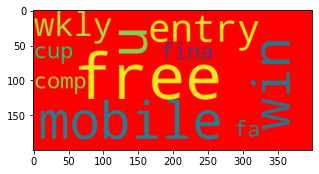

In [80]:
## This cloud is of Spam msg
cloud = WordCloud(max_words=10,background_color='red').generate(str(spam_df['message']) )

plt.figure(figsize= (5 , 5) )
plt.imshow(cloud)